# Análisis exploratorio de los datos de MiBici


MiBici es el sistema de transporte público de bicicletas en la ciudad Guadalajara, México. Implementada desde el año 2014 ha cambiado la forma de movernos en nuestra ciudad. Presta servicio todos los días del año, basado en la renta de bicicletas disponibles en estaciones ubicadas en los puntos más importantes de la ciudad. Puedes obtener el servicio mediante suscripción anual o suscripción temporal por 1, 3 o 7 días.
Debido a la dimensión de datos que se tienen. Se extrajo únicamente los datos disponibles del año 2023 (Enero 2023- Junio 2023), con lo cual se obtuvo una un total de 2,160,648 de filas(viajes).

### Gráficos 
1. Mes del año en el que el uso de servicio es más frecuente
2. Edad de los usuarios
3. Proporción del género 
4. Análisis de días y horas en las que más se usa el servicio.
5. Duración promedio de los viajes

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

archivos = [
    "datos_abiertos_2023_01.csv",
    "datos_abiertos_2023_02.csv",
    "datos_abiertos_2023_03.csv",
    "datos_abiertos_2023_04.csv",
    "datos_abiertos_2023_05.csv",
    "datos_abiertos_2023_06.csv"
]

# Realizamos nuestro df concatenando todos los archivos
datos = pd.concat(
    [pd.read_csv(archivo, encoding='latin1', parse_dates=['Inicio_del_viaje', 'Fin_del_viaje'], dayfirst=True) for
     archivo in archivos]
)

datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160648 entries, 0 to 339627
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Viaje_Id           int64  
 1   Usuario_Id         int64  
 2   Genero             object 
 3   Año_de_nacimiento  float64
 4   Inicio_del_viaje   object 
 5   Fin_del_viaje      object 
 6   Origen_Id          int64  
 7   Destino_Id         int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 148.4+ MB


In [18]:
datos.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,26751198,1350606,M,1983.0,2023-01-01 00:00:00,2023-01-01 00:26:00,154,50
1,26751199,15163,M,1986.0,2023-01-01 00:04:00,2023-01-01 00:07:00,64,79
2,26751200,1534764,M,1987.0,2023-01-01 00:06:00,2023-01-01 00:17:00,35,12
3,26751201,1240140,M,1996.0,2023-01-01 00:08:00,2023-01-01 00:09:00,35,35
4,26751202,1732214,M,1969.0,2023-01-01 00:09:00,2023-01-01 00:14:00,54,171


In [19]:
datos.isna().sum()

Viaje_Id                 0
Usuario_Id               0
Genero               10567
Año_de_nacimiento     4646
Inicio_del_viaje         0
Fin_del_viaje            0
Origen_Id                0
Destino_Id               0
dtype: int64

### Observaciones
1. La columna Inicio_del_viaje y Fin_del_viaje están como tipo object cuando debería ser datetime.
2. Las columnas de Genero y Año_de_nacimiento contienes valores ausentes.

Procedemos a continuar con nuestro análisis y a tratar las observaciones individualmente llegando el momento.

## Iniciamos nuestro análisis
Lo primero que queremos saber es cuál es el mes del año corriente en el que ha habido mayor número de viajes.

In [20]:
#Obtenemos el total de viajes por mes
datos['Inicio_del_viaje'] = pd.to_datetime(datos['Inicio_del_viaje'])
#Extraemos el mes en otra columna
datos['Mes'] = datos['Inicio_del_viaje'].dt.month
viajes_por_mes = datos['Mes'].value_counts().sort_index()
viajes_por_mes

Mes
1    366018
2    355291
3    402460
4    333093
5    364158
6    339628
Name: count, dtype: int64

Podemos observar que el número de viajes por mes asciende a más de 30 000, y que el mes 3 correspondiente al mes de Marzo tiene mayor número de viajes realizados hasta el momento. Esto lo podemos visualizar de mejor manera en un gráfico de barras.

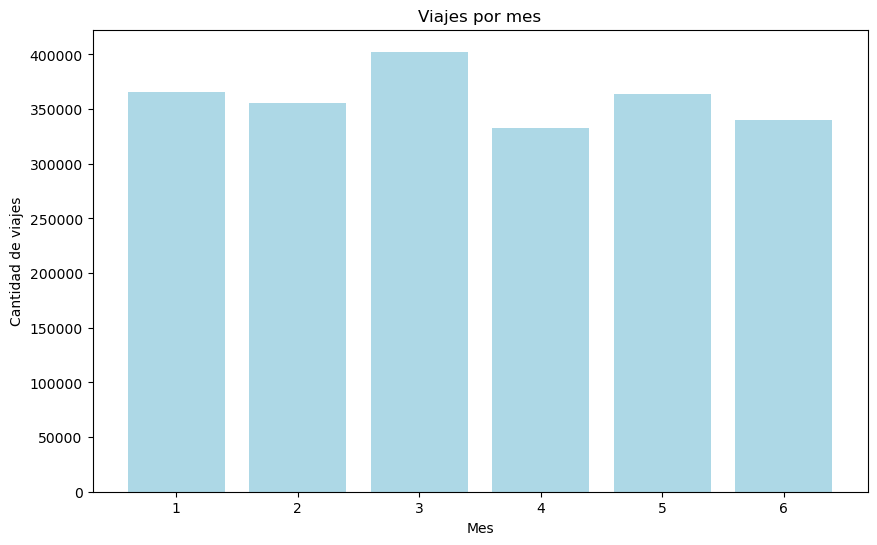

In [21]:
#Realizamos un gráfico de barras para visualizar los viajes realizados por mes.
plt.figure(figsize=(10,6))
plt.bar(viajes_por_mes.index, viajes_por_mes.values, color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.title('Viajes por mes')
plt.xticks(viajes_por_mes.index)
plt.show()

Ahora, para lo siguiente queremos saber más sobre los usuarios de MiBici, conociendo media de edad y la frecuencia, así también el porcentaje de usuarios del género F y M.
Para esto necesitamos evaluar solamente los valores únicos de Usuario_Id.

In [22]:
#Visualizamos las edades de los usuarios, considerando únicamente los Id únicos.
datos_unicos = datos.drop_duplicates(subset='Usuario_Id')
datos_unicos.isna().sum()#exploramos cuantos datos ausentes existen en las columnas

Viaje_Id               0
Usuario_Id             0
Genero               113
Año_de_nacimiento     61
Inicio_del_viaje       0
Fin_del_viaje          0
Origen_Id              0
Destino_Id             0
Mes                    0
dtype: int64

Consideramos que la cantidad de datos ausentes no es significativa, por lo que procedemos en nuestro análisis.

In [23]:
#Creamos una columna 'Edad' basado en la fecha de nacimiento.
datos_unicos['Año_de_nacimiento'] = pd.to_numeric(datos_unicos['Año_de_nacimiento'], errors='coerce')
datos_unicos['Edad'] = pd.to_datetime('now').year - datos_unicos['Año_de_nacimiento']
datos_unicos = datos_unicos[(datos_unicos['Edad'].notnull()) & (datos_unicos['Edad'] > 0)]
datos_unicos.Edad.describe() #Visualizamos estadistica básica

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3273147801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_unicos['Año_de_nacimiento'] = pd.to_numeric(datos_unicos['Año_de_nacimiento'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_9772\3273147801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_unicos['Edad'] = pd.to_datetime('now').year - datos_unicos['Año_de_nacimiento']


count    21970.000000
mean        33.586573
std         10.190850
min          1.000000
25%         26.000000
50%         31.000000
75%         39.000000
max        103.000000
Name: Edad, dtype: float64

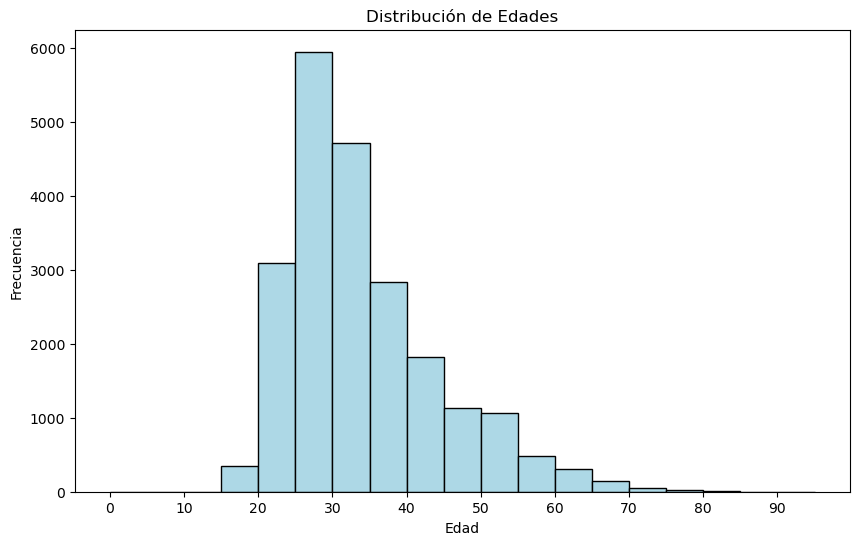

In [24]:
#Realizamos un Histograma de edades para visualizar mejor la estadisitica.
plt.figure(figsize=(10,6))
plt.hist(datos_unicos['Edad'], bins=range(0, 100, 5), edgecolor='black', color='lightblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.xticks(range(0, 100, 10))
plt.show()

Observamos en el histograma que la mayoría de los usuarios están entre los 20 y 40años. El promedio de edad es de 33 años.

A continuación visualizamos el porcentaje del género de los usuarios.

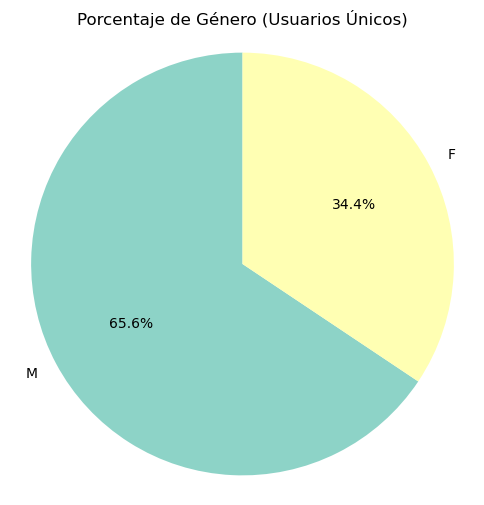

In [25]:
# Porcentaje de género de usuarios únicos
genero_porcentaje = datos_unicos['Genero'].value_counts(normalize=True) * 100

# Gráfico de pastel del porcentaje de género
plt.figure(figsize=(6, 6))
plt.pie(genero_porcentaje, labels=genero_porcentaje.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.axis('equal')
plt.title('Porcentaje de Género (Usuarios Únicos)')
plt.show()

Me interesa saber como se comporta el uso del sistema público de MiBici durante el transcurso del día y los días de la semana, por lo que voy a realizar una visualización llamada mapa de calor, dónde podremos observar mejor esto.

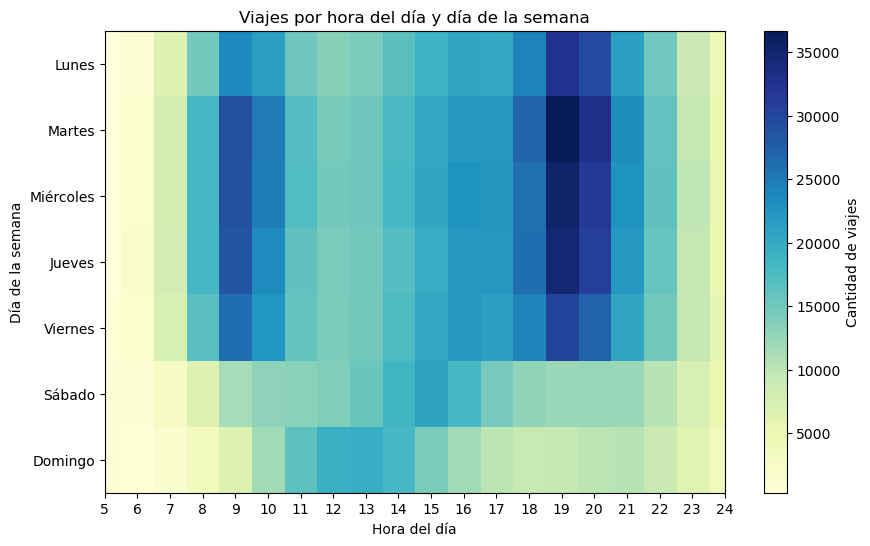

In [26]:
# Análisis de viajes por día de la semana y hora
datos['Dia_semana'] = datos['Inicio_del_viaje'].dt.dayofweek
datos['Hora'] = datos['Inicio_del_viaje'].dt.hour

# Creamos una nueva columna para la hora
datos['Hora_display'] = datos['Hora'].replace({0: 24})

matriz_frecuencia = pd.pivot_table(datos, values='Viaje_Id', index='Dia_semana', columns='Hora_display', aggfunc='count')

# Heatmap
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
horas = range(5, 25)  # Consideramos el rango de hora del servicio (de 5 am a 1 am del día siguiente)
plt.figure(figsize=(10, 6))
plt.imshow(matriz_frecuencia, cmap='YlGnBu', aspect='auto')
plt.xticks(np.arange(len(horas)), horas)
plt.yticks(np.arange(len(dias_semana)), dias_semana)
plt.xlim(0, len(horas)-1)
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.colorbar(label='Cantidad de viajes')
plt.title('Viajes por hora del día y día de la semana')
plt.savefig("Heatmap2.png")


Podemos observar que en el uso de MiBici entre semana es mayor en el horario de 8-9am y por la tarde 18-20. Qué podríamos concluir que la mayoría de los usuarios utilizan el sistema para transportarse al lugar de trabajo, al inicio y fin de su jornada laboral. Así como el día domingo podemos observar una mayor frecuencia de viajes en el horario que es la vía recreativa en la ZMG, de 10 a 16 horas.

Ahora por último veamos la duración promedio de los viajes.

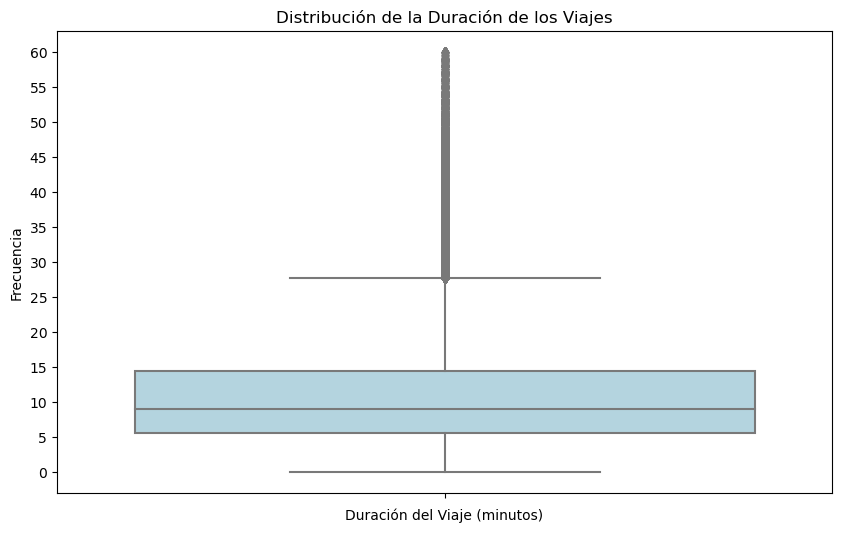

In [27]:
# Convertimos las columnas 'Inicio_del_viaje' y 'Fin_del_viaje' al tipo datetime
datos['Inicio_del_viaje'] = pd.to_datetime(datos['Inicio_del_viaje'])
datos['Fin_del_viaje'] = pd.to_datetime(datos['Fin_del_viaje'])# Calcular la duración de los viajes en minutos
datos['Duracion_minutos'] = (datos['Fin_del_viaje'] - datos['Inicio_del_viaje']).dt.total_seconds() / 60

# Filtrar viajes que duran menos de una hora
datos = datos[datos['Duracion_minutos'] <= 60]

# Crear un gráfico de caja de la duración de los viajes
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, y='Duracion_minutos', color='lightblue')
plt.yticks(range(0, int(datos['Duracion_minutos'].max()) + 5, 5))
plt.xlabel('Duración del Viaje (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de los Viajes')
plt.show()


Podemos concluir con el gráfico anterior que la duración de los viajes es entre 1 y  menos de 30 min, con una mediana de 9 min. Observando algunos valores átipicos mayores a 30 min. 
Esto considerando que los viajes de MiBici están restringidos a 30 min y cuando se realizan viajes de mayor duración se tiene una penalización monetaria.

### Conclusiones.
El análisis anterior ha sido meramente de curiosidad personal, ya que yo misma soy usuaria del sistema y me interesaba conocer más información sobre el uso y la utilidad del sistema. Así mismo quería plasmar mis conocimientos obtenidos en cursos anteriores y seguir desarrollando mis skills.